<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


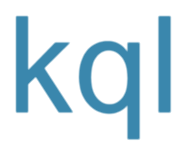

In [ ]:
%load_ext Kqlmagic

In [3]:
!pip install Kqlmagic --no-cache-dir --upgrade

Requirement already up-to-date: Kqlmagic in /home/nbuser/anaconda3_501/lib/python3.6/site-packages (0.1.108.post5)
You should consider upgrading via the 'pip install --upgrade pip' command.


In [1]:
from azure.kusto.data.request import KustoClient, KustoConnectionStringBuilder
kcsb = KustoConnectionStringBuilder.with_aad_device_authentication("https://cgadataout.kusto.windows.net")
kc = KustoClient(kcsb)

In [2]:
import datetime
query= """['kpi-visitor']
| where Area == 'Azure Architecture Center'
| project Month, MTD
| sort by Month asc"""
response = kc.execute("DevRelWorkArea", query)
names = []
values = []
for row in response.primary_results[0]:
    names.append(row[0].strftime("%b %Y"))
    values.append(row[1])
print(names)
print(values)

To sign in, use a web browser to open the page https://microsoft.com/devicelogin and enter the code FL6RY47EK to authenticate.
['Jun 2018', 'Jul 2018', 'Aug 2018', 'Sep 2018', 'Oct 2018', 'Nov 2018', 'Dec 2018', 'Jan 2019', 'Feb 2019', 'Mar 2019', 'Apr 2019', 'May 2019', 'Jun 2019', 'Jul 2019', 'Aug 2019', 'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019', 'Jan 2020', 'Feb 2020']
[178271, 182195, 186043, 184593, 203975, 207239, 183031, 221501, 228053, 260911, 254373, 248593, 245421, 268642, 252210, 251941, 301733, 296894, 279871, 352869, 299613]


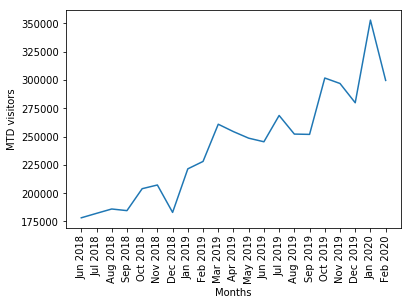

In [4]:
import matplotlib.pyplot as plt
plt.plot(names,values)
plt.xlabel('Months')
plt.ylabel('MTD visitors')
plt.xticks(rotation=90)
plt.show()

## Section Two

In [5]:
query= """let start = datetime(2019-01-01);
let end = datetime(2020-02-01);
let mau = ['kpi-visitor']
| where Area == 'Azure Architecture Center'
| where Month between(start..end)
| project Month, mau = MTD;
let return = ['kpi-return-visitor']
| where Area == 'Azure Architecture Center'
| where Month between(start..end)
| project Month, return_rate = visitors_returned_rate;
let perf = ['kpi-content-perf-repo-monthly']
| where Repo == 'architecture-center'
| where Month between(start..end)
| project Month, content_perf = rate_pageviews_overperforming;
let traffic = ['kpi-referrer-pageview-percentage']
| where Area == 'Azure Architecture Center'
| where Month between(start..end)
| project Month, organic = rate_organic, microsoft = rate_microsoft, direct = rate_direct;
mau
| join return on Month
| join perf on Month
| join traffic on Month
| project Month, mau, return_rate, content_perf, organic, microsoft, direct"""
response = kc.execute("DevRelWorkArea", query)
values = []
for row in response.primary_results[0]:
    values.append(row)
print(values)

[KustoResultRow(['Month', 'mau', 'return_rate', 'content_perf', 'organic', 'microsoft', 'direct'], [datetime.datetime(2019, 8, 1, 0, 0, tzinfo=tzutc()), 252210, 0.134582292533999, 0.688661241195507, 0.288338034182211, 0.543024121940474, 0.13718530428345]), KustoResultRow(['Month', 'mau', 'return_rate', 'content_perf', 'organic', 'microsoft', 'direct'], [datetime.datetime(2019, 4, 1, 0, 0, tzinfo=tzutc()), 254373, 0.108010677233826, 0.64496147834557, 0.320928882864815, 0.510843945866591, 0.139844231153035]), KustoResultRow(['Month', 'mau', 'return_rate', 'content_perf', 'organic', 'microsoft', 'direct'], [datetime.datetime(2019, 9, 1, 0, 0, tzinfo=tzutc()), 251941, 0.141481537344061, 0.711867045925562, 0.28773768474021, 0.547745106024816, 0.133592173259845]), KustoResultRow(['Month', 'mau', 'return_rate', 'content_perf', 'organic', 'microsoft', 'direct'], [datetime.datetime(2019, 10, 1, 0, 0, tzinfo=tzutc()), 301733, 0.112404012819281, 0.737434125305562, 0.287706571894794, 0.55117531235